<a href="https://www.kaggle.com/code/nadaahassan/face-analysis?scriptVersionId=142477291" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D
import os
Id=0
for dirname, _, filenames in os.walk('/kaggle/input/utkface-new/UTKFace'):
    for filename in filenames:
        
        if(Id==5):
            break 
        Id=Id+1
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/utkface-new/UTKFace/26_0_2_20170104023102422.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/22_1_1_20170112233644761.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/21_1_3_20170105003215901.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/28_0_0_20170117180555824.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/17_1_4_20170103222931966.jpg.chip.jpg


In [58]:
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

In [2]:

def load(folder_path):
    
    image_paths = []
    age_labels = []
    gender_labels = []

    for filename in os.listdir(data_dir):
        image_path = os.path.join(data_dir, filename)
        temp = filename.split('_')
        age = int(temp[0])
        gender = int(temp[1])
        image_paths.append(image_path)
        age_labels.append(age)
        gender_labels.append(gender)
        df = pd.DataFrame()
    df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
    return df 

In [4]:
data_dir = '/kaggle/input/utkface-new/UTKFace/'
df = load(data_dir)
df.head()

,image,age,gender
0,/kaggle/input/utkface-new/UTKFace/26_0_2_20170...,26,0
1,/kaggle/input/utkface-new/UTKFace/22_1_1_20170...,22,1
2,/kaggle/input/utkface-new/UTKFace/21_1_3_20170...,21,1
3,/kaggle/input/utkface-new/UTKFace/28_0_0_20170...,28,0
4,/kaggle/input/utkface-new/UTKFace/17_1_4_20170...,17,1


In [ ]:
for i in range(1,5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])
    plt.title(df.age[i]) 
    plt.axis('off')
plt.show()

In [7]:
import os
import cv2
import numpy as np

def prepare(folder_path, target_size=(128, 128)):
    images = []
    image_names = []  # To store the image file names without extensions
    for img_name in os.listdir(folder_path):
        # Check if the file has an image extension
        if img_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, target_size)
            images.append(img)
            
            # Extract the image name without extension
            image_name_without_extension = os.path.splitext(img_name)[0]
            image_names.append(image_name_without_extension)
            
    images = np.array(images)
    return images

data_dir = '/kaggle/input/utkface-new/UTKFace/'
images = prepare(data_dir)


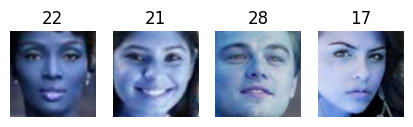

In [26]:
for i in range(1,5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])
    plt.title(df.age[i]) 
    plt.axis('off')
plt.show()

<Axes: xlabel='age', ylabel='Density'>

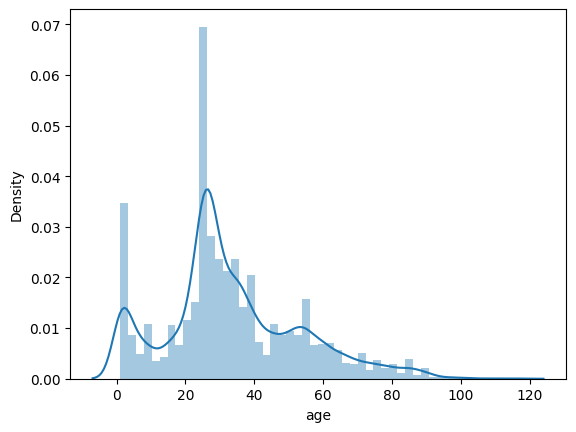

In [27]:
sns.distplot(df['age'])

<Axes: xlabel='gender', ylabel='Count'>

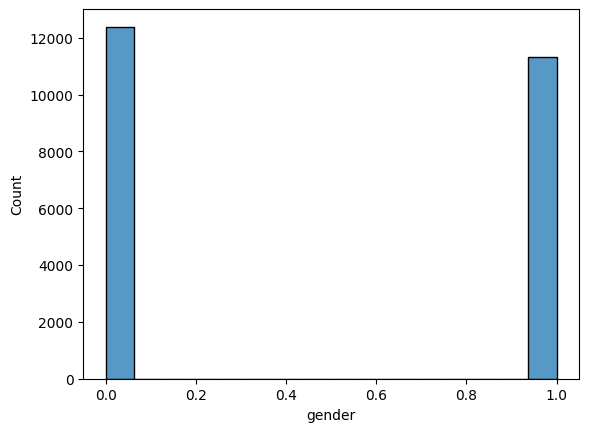

In [18]:
sns.histplot(df['gender'])


In [19]:
df.isna().sum()

image     0
age       0
gender    0
dtype: int64

In [21]:
df.describe()

,age,gender
count,23708.000000,23708.000000
mean,33.303484,0.477349
std,19.886112,0.499497
min,1.000000,0.000000
25%,23.000000,0.000000
50%,29.000000,0.000000
75%,45.000000,1.000000
max,116.000000,1.000000


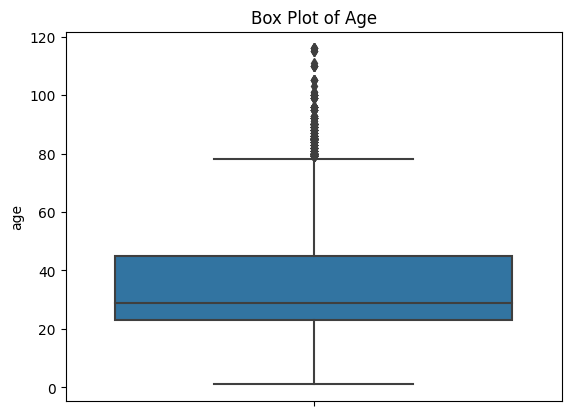

In [22]:
sns.boxplot(data=df, y='age')
plt.title('Box Plot of Age')
plt.show()

In [28]:
images.shape

(23708, 128, 128, 3)

In [29]:
X = images/255.0

In [30]:
y_gen = np.array(df['gender'])
y_age = np.array(df['age'])

In [33]:
input_shape = X.shape[1:]

input_layer = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)

age_out = Dense(1, name='age_output')(x)
gender_out = Dense(1, activation='sigmoid', name='gender_output')(x)

model = Model(inputs=input_layer, outputs=[age_out, gender_out])

model.compile(optimizer='adam',
              loss={'age_output': 'mean_squared_error', 'gender_output': 'binary_crossentropy'},
              metrics={'age_output': 'mae', 'gender_output': 'accuracy'})

history = model.fit(X, {'age_output': y_age, 'gender_output': y_gen},
                    epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
593/593 [==============================] - 342s 574ms/step - loss: 284.5236 - age_output_loss: 283.5916 - gender_output_loss: 0.9320 - age_output_mae: 12.6516 - gender_output_accuracy: 0.5904 - val_loss: 230.4605 - val_age_output_loss: 229.8655 - val_gender_output_loss: 0.5950 - val_age_output_mae: 11.2141 - val_gender_output_accuracy: 0.6788
Epoch 2/10
593/593 [==============================] - 332s 560ms/step - loss: 155.4237 - age_output_loss: 154.7772 - gender_output_loss: 0.6465 - age_output_mae: 9.3570 - gender_output_accuracy: 0.6554 - val_loss: 116.2754 - val_age_output_loss: 115.7107 - val_gender_output_loss: 0.5648 - val_age_output_mae: 8.1705 - val_gender_output_accuracy: 0.7149
Epoch 3/10
593/593 [==============================] - 330s 556ms/step - loss: 121.5571 - age_output_loss: 120.9678 - gender_output_loss: 0.5893 - age_output_mae: 8.2458 - gender_output_accuracy: 0.6939 - val_loss: 106.6553 - val_age_output_loss: 106.1308 - val_gender_output_loss: 0.5246 - 

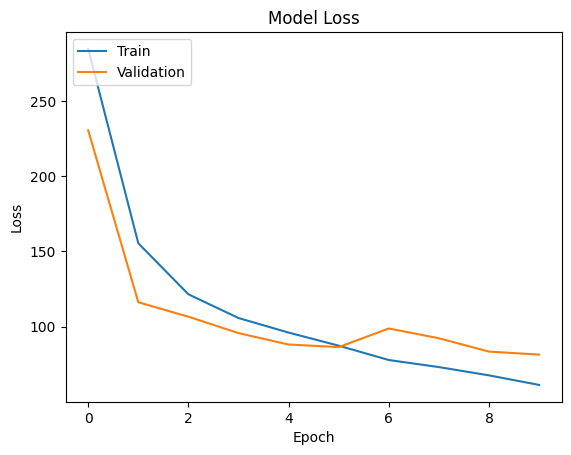

In [35]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




In [60]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    
    restore_best_weights=True 
)

In [38]:
gender_dict = {0:'Male', 1:'Female'}

Original Gender: Female Original Age: 34


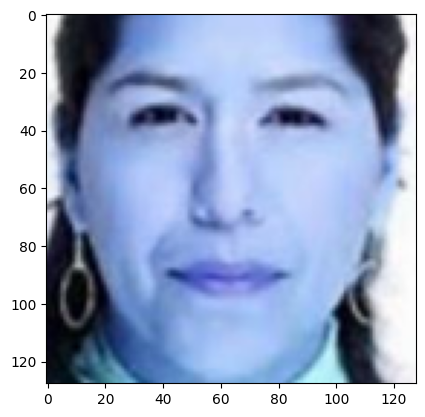

1/1 [==============================] - 0s 31ms/step
Predicted Gender: Female Predicted Age: 36


In [67]:
image_index = 60

print("Original Gender:", gender_dict[y_gen[image_index]], "Original Age:", y_age[image_index])
original_image = images[image_index]  
plt.imshow(original_image)
plt.show()

input_image = cv2.resize(original_image, (128, 128))
input_image = input_image.reshape(1, 128, 128, 3)

input_image = input_image / 255.0

pred = model.predict(input_image)

pred_gender = gender_dict[round(pred[1][0][0])]
pred_age = round(pred[0][0][0])  


print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
